# Nonlinear Least squares fitting for semi-empirical models of sedimentation or hetero-aggregation

$$Fengbo\, Zhang$$
$$(IHE\, DELFT,\, T:\, +31\,645283775,\, E:\, Fzh001@un-ihe.org)$$

## 0. General commands

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares # nonlinear least squares

In [49]:
# define the framework of figure

def newfig(title='forgot title?', xlabel='forgot xalbel?', ylabel='forgot ylabel?', xlim=None, ylim=None,
           xscale='linear', yscale='linear', size_inches=(12, 6)):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if not xlim is None: ax.set_xlim(xlim)
    if not ylim is None: ax.set_ylim(ylim)
    ax.grid()
    return ax


## 1. Example
### 1.1 nonlinear least square for scalar function

the scalar function: 
$$ y(t)= \frac K{1+ e^{-r(t-t_0)}}$$

[array([1.04948624, 8.89993836, 0.48242099])]


array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

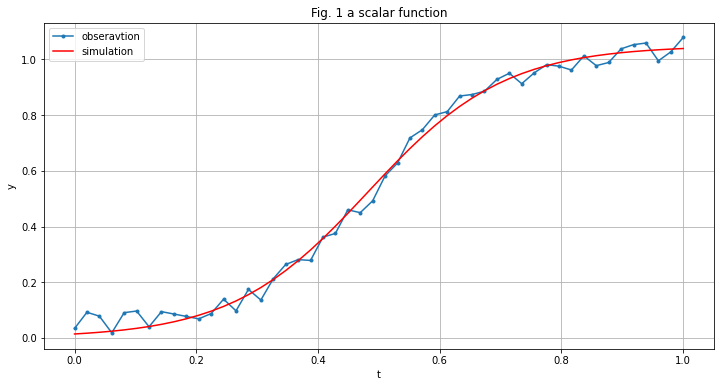

In [114]:
# define a scalar function 
def y(theta, t):
    return theta[0] / (1 + np.exp(- theta[1] * (t - theta[2]))) 

# simulate real data
ts = np.linspace(0, 1)
K = 1; r = 10; t0 = 0.5; noise = 0.1
ys = y([K, r, t0], ts) + noise * np.random.rand(ts.shape[0]) 

# difference between fit data and real data - residuals
def fun(theta):
    return y(theta, ts) - ys

# find the minimun residuals and export the optimize parameters(K, r, t0)
theta0 = [1,2,3]
theta_est=[]
res = least_squares(fun, theta0) 
theta_est.append(res.x)
ym = y(res.x, ts)

# plot the results
print(theta_est)
ax = newfig(title='Fig. 1 a scalar function', xlabel='t', ylabel='y')
ax.plot(ts, ys, '.-', label='obseravtion')
ax.plot(ts, ym, 'r', label='simulation')
ax.legend()


### 1.2 Goodness of fit and parameter distribution estimation
 Since we are doing least-square estimation, one of the easiest errors to calculate is the mean squared error [MSE]
$$MSE =\frac 1{N} \sum_{i=1}^{N} f_i(\hat{\theta}) $$
 it is a function of both the training data set and the parameters themselves. In the previous case the MSE can be calculated easily with Python, by using the result object returned by least_squares:


MSE in this case :  0.001426


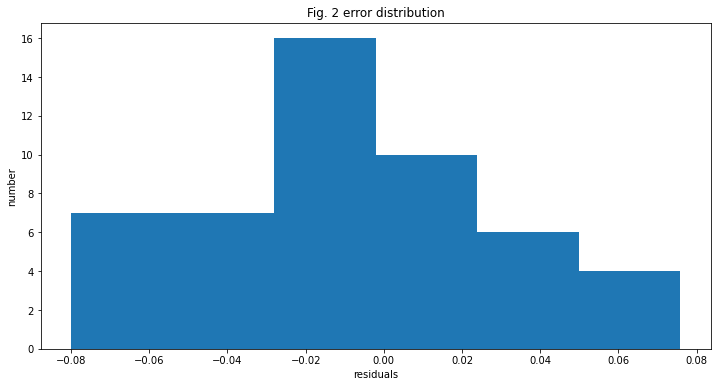

In [51]:
# mean squared error[MSE]
mse = (res.fun ** 2).mean()
print(f'MSE in this case : {mse: 3f}')

#error distribution - histogram
ax0 = newfig(title='Fig. 2 error distribution', xlabel='residuals', ylabel='number')
bins = int(1+ 1.33 * np.log(np.count_nonzero(res.fun))) # bins = 1+1.33ln(n)
ax0.hist(res.fun, bins)
ax0.grid(False)

### 1.3 Simulation with confidence intervals

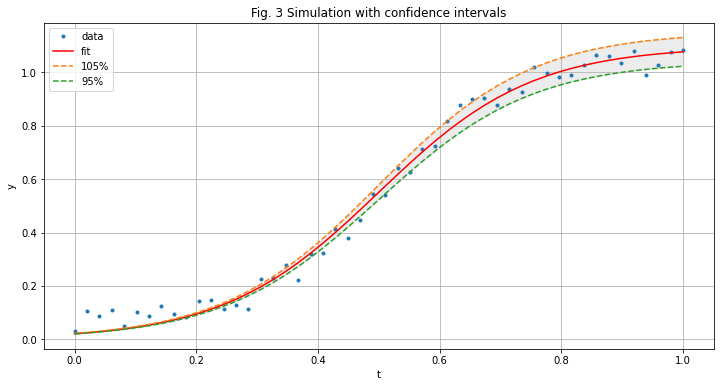

In [52]:
#set the confidence intervals between 105% and 95%
ym= y(res.x, ts)
y05= ym * 1.05
y95= ym * 0.95

ax1 = newfig(title='Fig. 3 Simulation with confidence intervals', xlabel='t', ylabel='y')
ax1.plot(ts, ys, '.', label = 'data')
ax1.plot(ts, ym, 'r', label = 'fit')
ax1.plot(ts, y05, '--', label = '105%')
ax1.plot(ts, y95, '--', label = '95%')
ax1.fill_between(ts, y05, y95, alpha = 0.15, color = 'gray')

ax1.legend()

## 2. Sedimentation model from Quik et.al.(2012)
### 2.1 nonlinear least squares
<b>the sedimentation model: </b>

$$C_t = (C_0 - C_n ) e^{-\frac V{h}t}+ C_n$$

$𝐶_𝑛$ [mg/L] - the non-settling concentration; <br>
$𝐶_0$ [mg/L]   - the initial concentration at the start; <br>
$𝐶_𝑡$  [mg/L]  - the concentration at the t th time;  <br>
$𝑡$ [h]           - time;<br>
$𝑉_𝑠 $[cm/h]   - the apparent sedimentation rate; <br>
$ℎ_𝑠$ [cm]       - the sedimentation length.  <br>

In [154]:
# input the parameters and observation data
obsdata = pd.read_excel('Observation data_ silica.xlsx', sheet_name='example', usecols=('B,D:E'))
Params = []
ts = []
Ct = []
for iw in range(len(obsdata)):  
    params, time, con = obsdata.iloc[iw][['parameters','time(h)', 'observation data(mg/l)']]
    Params.append(params)
    ts.append(time)
    Ct.append(con)

C0 = Params[0] # intial concentration [mg/l] 
Cn = Params[1] # the non-settling concentration[mg/l] 
h  = Params[2] # the sedimentation length[cm/h]

Params, ts, Ct

([10.0, 5.0, 4.0, nan, nan, nan, nan],
 [0.0, 2.0, 4.0, 6.0, 8.0, 12.0, 24.0],
 [10.040443175424313,
  6.8569750913983345,
  5.724026247625883,
  5.301899346790742,
  5.15710769925854,
  5.098625244658923,
  5.040156292748838])

 active_mask: array([0.])
        cost: 0.007762567408463827
         fun: array([-0.04044318,  0.03511775, -0.00802318, -0.03095049, -0.05457562,
       -0.08394259, -0.04011318])
        grad: array([-1.86417514e-08])
         jac: array([[ 0.00000000e+00],
       [-9.46046400e-01],
       [-7.16003071e-01],
       [-4.06423276e-01],
       [-2.05064173e-01],
       [-4.40479563e-02],
       [-2.58689435e-04]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 10
        njev: 10
  optimality: 1.864175137460674e-08
      status: 2
     success: True
           x: array([1.94350874])
[array([1.94350874])]


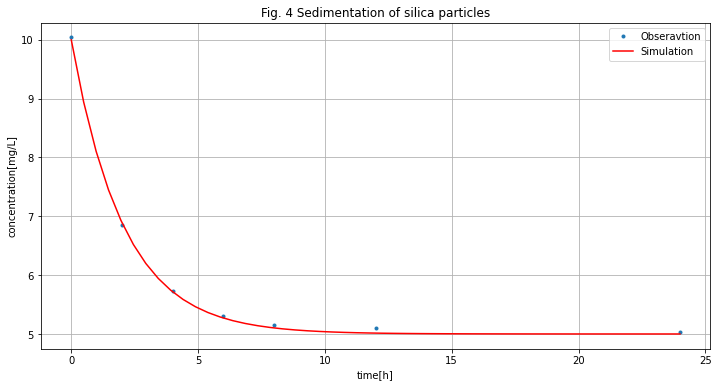

In [155]:
# define the sedimentation equation and input parameters
def C(v, t):
    return (C0- Cn ) * np.exp(- v / h * t) + Cn


# difference between fit data and real data - residuals
def fun(v):
    return C(v, ts) - Ct

# find the minimun residuals and export the optimize parameters(v)
v0 = [0] # pre-set the apparent sedimentation rate[cm/h]
v_est=[]
res1 = least_squares(fun, v0) 
v_est.append(res1.x)

tn = np.linspace(0, 1)*24
Cm = C(res1.x, tn)

# plot the results
print(res1)
print(v_est)
ax = newfig(title='Fig. 4 Sedimentation of silica particles', xlabel='time[h]', ylabel='concentration[mg/L]')
ax.plot(ts, Ct, '.', label='Obseravtion')
ax.plot(tn, Cm, 'r', label='Simulation')
ax.legend()

### 2.2 Goodness of fit and error distribution

MSE in this case :  0.002218


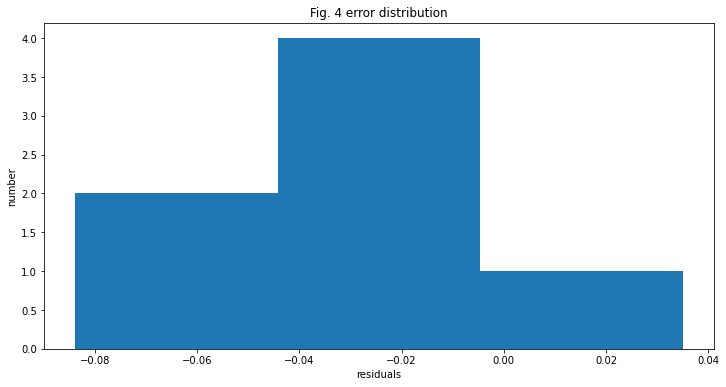

In [156]:
# mean squared error[MSE]
mse = (res1.fun ** 2).mean()
print(f'MSE in this case : {mse: 3f}')

#error distribution - histogram
ax0 = newfig(title='Fig. 4 error distribution', xlabel='residuals', ylabel='number')
bins = int(1+ 1.33 * np.log(np.count_nonzero(res.fun))) # bins = 1+1.33ln(n)
ax0.hist(res.fun, bins)
ax0.grid(False)

### 2.3 Simulation with confidence intervals

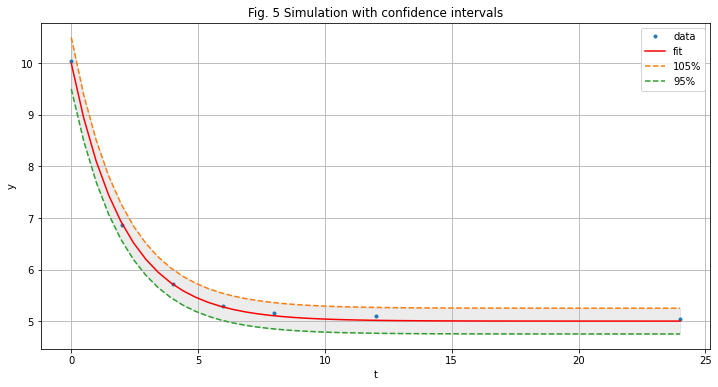

In [159]:
#set the confidence intervals between 105% and 95%
Cm= C(res.x, tn)
C05= Cm * 1.05
C95= Cm * 0.95

ax1 = newfig(title='Fig. 5 Simulation with confidence intervals', xlabel='t', ylabel='y')
ax1.plot(ts, Ct, '.', label = 'data')
ax1.plot(tn, Cm, 'r', label = 'fit')
ax1.plot(tn, C05, '--', label = '105%')
ax1.plot(tn, C95, '--', label = '95%')
ax1.fill_between(tn, C05, C95, alpha = 0.15, color = 'gray')

ax1.legend()

## 3. hetero- and homo- aggregation model from Quik et.al.(2014)
### 3.1 Nonlinear least squares 

<b> hetero- and homo- aggregation model:
    